# Example usage of the provided scripts
In this Jupyter notebook file, we explore the capabilities of the code provided for the thesis, which could be found on '[INSERT LINK]'

In [18]:
#we first import the modules, containing the scripts needed
import preprocessing
import clustering

In [19]:
df= preprocessing.file_opener() #opening the file
df= df.drop('task', axis = 1) #discard 'task' column, since we don't need it

print(df.label.value_counts()) #print the distribution of the dataset
df.head() #display the first 5 rows of the dataset

3.0    83025
0.0    43609
2.0    14507
1.0     9713
Name: label, dtype: int64


,0,1,2,3,4,5,label
0,19.770703,0.460578,0.406713,0.001356,0.646241,155.928928,3.0
1,5.638236,0.314984,0.389289,0.001298,0.628583,173.623629,3.0
2,1.265950,-0.738792,0.374806,0.001249,0.623892,184.534718,3.0
3,1.354811,-0.321053,0.362937,0.001210,0.630527,189.293734,3.0
4,2.595628,0.030725,0.353355,0.001178,0.646847,188.532215,3.0


### data evaluation I
In the provided table, we can see that the data is loaded correctly, but is not normalized. Normalization of the data is needed, since the data is dimensionless. We can also see that not each label is reperesented equally, which means that we need to do databalancing.

In [20]:
df = preprocessing.random_undersampler(df) #We randomly undersample the data
print(df.label.value_counts())

3.0    9713
2.0    9713
0.0    9713
1.0    9713
Name: label, dtype: int64


We can now see that Each label is represented equally, which means that we can continue to following steps. We are now going to normalize the data, with our own made normalization function, since this function normalizes the data per column and not over the whole dataset in once.

In [21]:
labels = df.label   #we do not want the labels to be normalized, so remove them temporarily from the dataset.
df= df.drop('label', axis = 1)

In [22]:
df = preprocessing.normalize(df)    #self made normalization function

In [29]:
df.head()   #check the preprocessed dataset

,0,1,2,3,4,5
4799,0.000868,0.865272,0.404586,0.566515,0.335754,0.449891
3077,0.000428,0.816026,0.404624,0.566389,0.491194,0.568572
19536,0.000055,0.697549,0.404632,0.566086,0.266149,0.490393
11137,0.000005,0.332559,0.404572,0.566595,0.365931,0.570092
13315,0.000016,0.656816,0.404766,0.566752,0.374871,0.486119


## data evaluation II
The preprocessed dataset now shows normalized values and as shown above is balanced equally. We will now continue with the clustering of the data

# Clustering
We will now cluster the data and put it in files, called 'percentages'. these files contain The clusternumber, label distribution, label, percentage of majority label and the coordinates of the cluster center. We save it in files, to get consistent results in the clustering analysis.

In [24]:
clustering.clustering_filemaker(df, labels, 'all') 

10
50
100
10
50
100
10
50
100
10
50
100


<Figure size 640x480 with 0 Axes>

We now read the file we created before and proces it further, so it could be used.

In [25]:
import pandas as pd
task = 'all'
cluster_number = 50
clusters = pd.read_csv('plots/clustering/t_%s/c_%i/percentages.csv'%(task, cluster_number)) #read the created csv file
clusters = clustering.convert_perc_to_ratio(clusters)   #convert the percentages to ratios, which could be used in the rest of the script

In [26]:
#we now change the string of 'cluster center' to a list and check the result of the preprocessing
centroids = []
for i in clusters.values:
    centroids.append([float(num) for num in i[4].replace('[', '').replace(']','').split()])
clusters['cluster center'] = centroids
clusters.head()

,cluster,label distribution,label,label percentage,cluster center
0,0,"{0: 130, 1: 383, 2: 622, 3: 219}",2,0.46,"[0.00058275, 0.28541932, 0.40484749, 0.5662236..."
1,1,"{0: 649, 1: 171, 2: 111, 3: 168}",0,0.59,"[3.41436625e-05, 0.759379768, 0.404568339, 0.5..."
2,2,"{0: 111, 1: 326, 2: 72, 3: 201}",1,0.46,"[4.90226075e-05, 0.268588634, 0.404753653, 0.5..."
3,3,"{0: 100, 1: 126, 2: 254, 3: 298}",3,0.38,"[0.000180681354, 0.915050864, 0.406605793, 0.5..."
4,4,"{0: 115, 1: 363, 2: 249, 3: 302}",1,0.35,"[7.43702829e-05, 0.734285715, 0.405439447, 0.5..."


## clustering evaluation I
we can see that the data is loaded properly and after the preprocessing we did above, we can also see that it is in the correct format for further usage. We will now find the closest eucledian distance for datapoints in the dataset and take the confidecnce score of the cluster into account, to predict to which cluster a datapoint belongs. more explanation of this method could be found in the paper: CLASSIFICATION OF GAZE EVENTS IN MOBILE EYE-TRACKERS USING MACHINE LEARNING

In [27]:
predicted = clustering.predict(df, clusters.values)

task: all
              precision    recall  f1-score   support

         0.0       0.18      0.31      0.22      9713
         1.0       0.21      0.36      0.27      9713
         2.0       0.15      0.08      0.10      9713
         3.0       0.00      0.00      0.00      9713

    accuracy                           0.19     38852
   macro avg       0.13      0.19      0.15     38852
weighted avg       0.13      0.19      0.15     38852



/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

Text(0.5, 1.0, 'task: all')

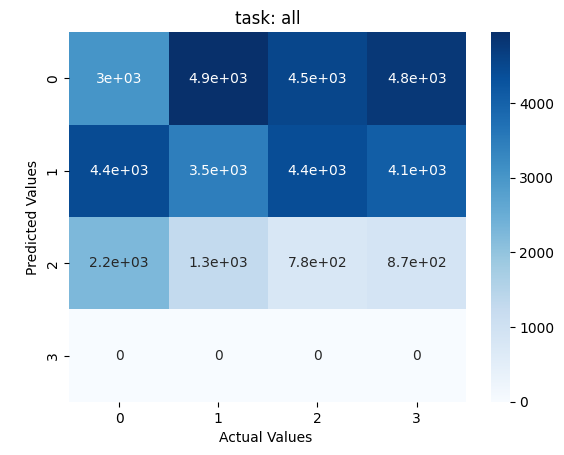

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns

print('task: ' + task)
print(classification_report(labels, predicted))
plt.clf()
ax = sns.heatmap(confusion_matrix(predicted, labels), annot=True, cmap='Blues')

ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.set_title('task: '+ str(task))

## Clustering evaluation II
We can see that the F1-scores are very poor, showing that this method could not be used for predicting gaze events in mobile eye-trackers.

# Conclusion
The code in this project provides a versatile toolbox for data scientists, specially made for using unsupervised machine learning, to classify gaze events in mobile eye-trackers. The proposed method could not be used to accurately predict gaze events, but we believe that the provided toolbox opens possibilities for further research!